# Multi class claffication using SGD classifier for MNIST dataset

In [ ]:
from sklearn.datasets import fetch_openml #fetch_mldata
#mnist=fetch_mldata("MNIST original")
mnist=fetch_openml("mnist_784")
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

fetch_mldata() is deprecated since Scikit-Learn 0.20. You should use fetch_openml() instead. However, it returns the unsorted MNIST dataset, whereas fetch_mldata() returned the dataset sorted by target (the training set and the test test were sorted separately). In general, this is fine, but if you want to get the exact same results as before, you need to sort the dataset using the following function:


In [ ]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [ ]:
import numpy as np
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

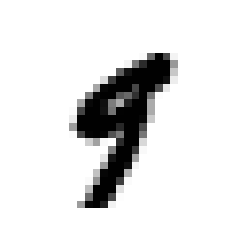

9

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000] # # fetch_openml() returns an unsorted dataset
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[36000]

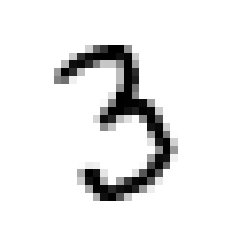

3

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[30000] # # fetch_openml() returns an unsorted dataset
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[30000]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print(xtrain,ytrain,xtest,ytest)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [5 4 8 ... 1 0 0] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [8 4 8 ... 2 7 1]
(56000, 784) (56000,) (14000, 784) (14000,)


In [ ]:
from sklearn.linear_model import SGDClassifier
import numpy as np


sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42,loss='hinge')
sgd_clf.fit(xtrain, ytrain)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])

array([3], dtype=int8)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,xtrain,ytrain,cv=3,scoring='accuracy')

array([0.87630578, 0.86602025, 0.8593164 ])

In [ ]:
from sklearn.model_selection import cross_val_predict
ypred=cross_val_predict(sgd_clf,xtest,ytest,cv=3)

In [ ]:
print(ypred,ypred.shape)

[6 4 5 ... 1 0 0] (56000,)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,ypred)

array([[5317,    1,   43,   57,   13,   27,   39,    8,   46,    9],
       [   1, 6043,   34,   27,   11,   13,   16,    9,  116,    7],
       [  36,   82, 4887,  206,   91,   18,   82,   56,  123,   29],
       [  23,   28,  157, 5190,   19,   96,   24,   41,   60,   70],
       [   9,   22,   40,   20, 5036,   21,   39,   17,   55,  270],
       [  81,   38,   61,  523,  115, 3744,  150,   31,  218,   79],
       [  65,   29,   68,   20,   65,   65, 5095,    5,   63,    5],
       [  15,   51,   81,   89,   83,   12,    3, 5131,   23,  302],
       [  53,  246,  138,  638,  122,  267,   68,   32, 3738,  166],
       [  29,   48,   32,  246,  335,   55,    3,  278,  129, 4383]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
prec=precision_score(ytrain,ypred, average="macro")
reca=recall_score(ytrain,ypred, average="macro")
print(prec,reca)

0.8685385433853867 0.8644062413280373


In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(ytrain,ypred, average="macro")
print(f1)

0.8643157966997796


In [ ]:
yscore=cross_val_predict(sgd_clf,xtrain,ytrain,cv=3,method="decision_function")
yscore

array([[ -455519.23466397,  -555181.2870192 ,  -423038.18945695, ...,
        -1314059.63312378,  -377801.25161337,  -526209.9726529 ],
       [ -674476.99960557,  -771931.43622203,  -397447.18638764, ...,
         -452548.04858972,  -101133.64354788,  -426301.73239372],
       [-1767484.71552336,  -417980.22554764,  -652246.88158756, ...,
         -828370.04961283,  -274064.20028758,  -263867.27506573],
       ...,
       [-1224180.86932399,   127925.55342692,  -294275.70662297, ...,
         -388179.6358681 ,  -113268.67900258,  -138172.04524749],
       [  385215.78116167, -1269248.78010709,  -605725.70635655, ...,
         -919333.68901485,  -563463.22365299, -1016089.12265503],
       [  214410.21391296,  -995111.38927536,  -367007.53766593, ...,
        -1539703.27589387,  -856703.76950766, -1407989.06350834]])

In [ ]:
print(yscore.shape,yscore[0],ypred[0])
print(np.argmax(yscore[0]))

(56000, 10) [ -455519.23466397  -555181.2870192   -423038.18945695  -156589.59397545
  -197665.57787774   -31158.87837772    89642.89921765 -1314059.63312378
  -377801.25161337  -526209.9726529 ] 6
6


In [ ]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [ ]:
print(ytrain.shape,ypred.shape,yscore.shape)

(56000,) (56000,) (56000, 10)


In [ ]:
'''
from sklearn.metrics import precision_recall_curve
precc,recc,thres=precision_recall_curve(ytrain,yscore)
#Compute precision-recall pairs for different probability thresholds.

#Note: this implementation is restricted to the binary classification task.

'''

'\nfrom sklearn.metrics import precision_recall_curve\nprecc,recc,thres=precision_recall_curve(ytrain,yscore)\n#Compute precision-recall pairs for different probability thresholds.\n\n#Note: this implementation is restricted to the binary classification task.\n'

In [ ]:
'''
from sklearn.metrics import roc_curve
fpr,tpr,thress=roc_curve(ytrain,yscore)

Compute Receiver operating characteristic (ROC).

Note: this implementation is restricted to the binary classification task.
'''

In [ ]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(ytrain,sgd_clf.predict_proba(xtrain),multi_class='ovr')

# OneVsOneClassifier, OneVsRestClassifier

In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(xtrain, ytrain)
ovo_clf.predict([some_digit])

array([3], dtype=int8)

In [ ]:
len(ovo_clf.estimators_) #If there are N classes, you need to train N × (N – 1) / 2 classifiers. 

45

In [ ]:
ovo_clf.estimators_

(SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
               n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
               random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
               verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
               n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
               random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
               verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       

In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
ova_clf=OneVsRestClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ova_clf.fit(xtrain,ytrain)
ova_clf.predict([some_digit])

array([3], dtype=int8)

In [ ]:
len(ova_clf.estimators_)

10

In [ ]:
ypred_m1=ovo_clf.predict(xtest)
print(f1_score(ytest,ypred_m1, average="macro"))

ypred_m2=ova_clf.predict(xtest)
print(f1_score(ytest,ypred_m2, average="macro"))

0.908435945659674
0.8451296986920992


In [ ]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(ytrain,ova_clf.predict_proba(xtrain),multi_class='ovr')

# Classifier with normal and scaled normalized features

In [ ]:
cross_val_score(sgd_clf, xtrain, ytrain, cv=3, scoring="accuracy")

array([0.87630578, 0.86602025, 0.8593164 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, ytrain, cv=3, scoring="accuracy")

array([0.91069802, 0.90839449, 0.90946105])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, ytrain, cv=3)
conf_mx = confusion_matrix(ytrain, y_train_pred)
conf_mx

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytrain,y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5560
           1       0.95      0.96      0.96      6277
           2       0.91      0.90      0.90      5610
           3       0.90      0.87      0.89      5708
           4       0.92      0.92      0.92      5529
           5       0.88      0.85      0.86      5040
           6       0.93      0.95      0.94      5480
           7       0.93      0.92      0.93      5790
           8       0.85      0.86      0.86      5468
           9       0.86      0.89      0.88      5538

    accuracy                           0.91     56000
   macro avg       0.91      0.91      0.91     56000
weighted avg       0.91      0.91      0.91     56000



In [ ]:
y_train_pred_noscale = cross_val_predict(sgd_clf, xtrain, ytrain, cv=3)
conf_mx = confusion_matrix(ytrain, y_train_pred_noscale)
conf_mx

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:276: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytrain,y_train_pred_noscale))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5560
           1       0.92      0.96      0.94      6277
           2       0.88      0.87      0.88      5610
           3       0.74      0.91      0.82      5708
           4       0.86      0.91      0.88      5529
           5       0.87      0.74      0.80      5040
           6       0.92      0.93      0.93      5480
           7       0.91      0.89      0.90      5790
           8       0.82      0.68      0.74      5468
           9       0.82      0.79      0.81      5538

    accuracy                           0.87     56000
   macro avg       0.87      0.86      0.86     56000
weighted avg       0.87      0.87      0.87     56000



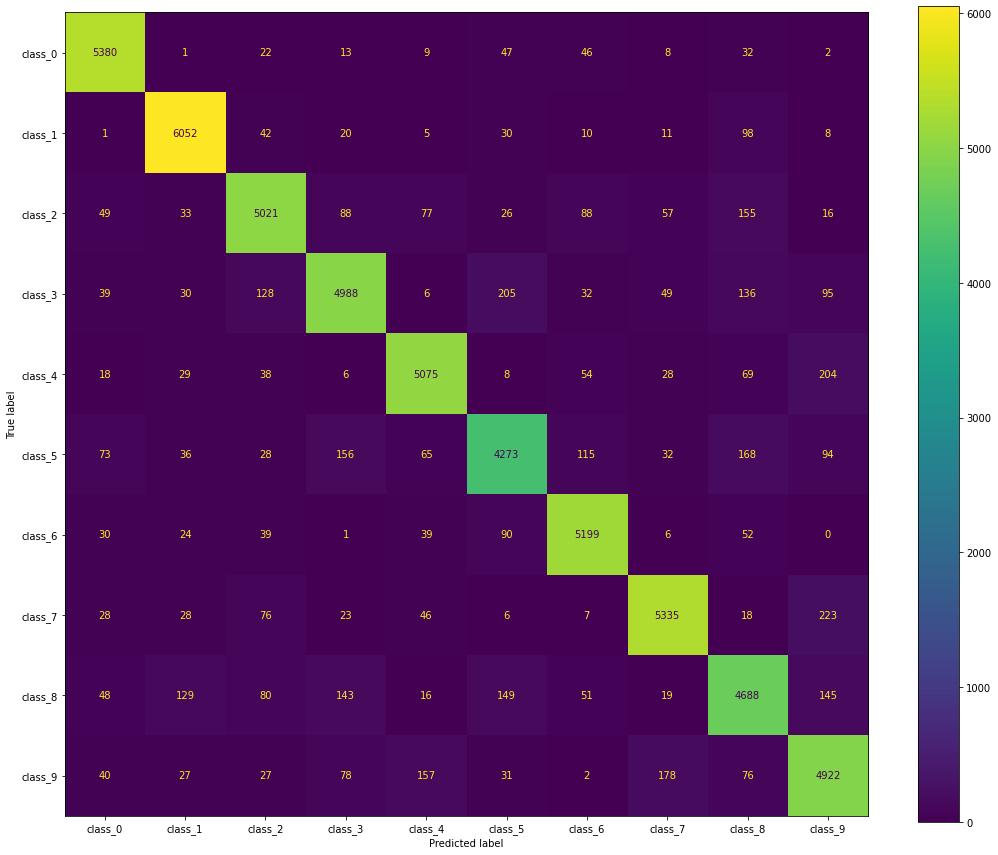

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(18, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(ytrain, y_train_pred),
    display_labels=["class_0","class_1", "class_2", "class_3", "class_4","class_5","class_6","class_7","class_8","class_9"],
)

cmp.plot(ax=ax,values_format = '.5g') 
plt.show();